In [1]:
import datetime
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from matplotlib import style
from subprocess import check_output

import models
import utils
import visuals

warnings.filterwarnings("ignore")
style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)

Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
input_dir = '../input'
print('Choose a file from the following list: \n')
print(check_output(["ls", input_dir]).decode("utf8"))

Choose a file from the following list: 

bitcoin_cash_price.csv
bitcoin_dataset.csv
bitcoin_price.csv
bitconnect_price.csv
dash_price.csv
ethereum_classic_price.csv
ethereum_dataset.csv
ethereum_price.csv
iota_price.csv
litecoin_price.csv
monero_price.csv
nem_price.csv
neo_price.csv
numeraire_price.csv
omisego_price.csv
qtum_price.csv
ripple_price.csv
stratis_price.csv
waves_price.csv



In [3]:
print('Enter Currency File Name: ')
# name = input()
name = 'bitcoin_price.csv'

x_train, x_test, x_recent, y_train, y_test, df = utils.load_data(input_dir, name)
print('---------------------------------------')
print(x_train.shape[0], 'training samples.' )
print(x_test.shape[0], 'test samples.' )
print('Predicting {} days'.format(x_recent.shape[0]))
print('Train sample shape: ', x_train.shape)
print('Test sample shape: ', x_test.shape)
print('Train label shape:', y_train.shape)
print('Test label shape:', y_test.shape)

Enter Currency File Name: 
---------------------------------------
1260 training samples.
316 test samples.
Predicting 16 days
Train sample shape:  (1260, 6)
Test sample shape:  (316, 6)
Train label shape: (1260,)
Test label shape: (316,)


In [ ]:
"""
Choose model type:
1. Linear Regression
2. Support Vector Regression
3. Multilayer Perceptron
"""
print('Choose Model: [1]LinearRegression [2]SVR [3]MLP\n')
choice = int(input())
# choice = 3

if choice == 1: 
    model = models.LR(x_train, y_train, x_test, y_test, x_recent)
    print('Linear Regression model selected.\n')
elif choice == 2:
    model = models.SVR(x_train, y_train, x_test, y_test, x_recent)
    print('Support Vector Regression model selected.\n')
elif choice == 3:
    model = models.MLP(x_train, y_train, x_test, y_test, x_recent)
    model.build()
    print('Multilayer Perceptron model selected.\n')

""" 
Choose operation type:
1. Train the model on training set
2. Evaluate metric on test set
3. Forecast prediction 
"""
print('Choose op: [1]Train, [2]Test, [3]Predict.\n')
op = int(input())
# op = 3

if op == 1:
    print('Training initiated...\n')
    model.train()
elif op == 2:
    print('Evaluating model on test data...\n')
    model.test()
elif op == 3:
    print('Predicting future values...\n')
    preds = model.predict()
    print('Forecast Plot')
    utils.forecast_plot(df, preds)

In [ ]:
# Visualization
currencies = visuals.load()

In [4]:
# Target currency type and target feature(s)

coin_type = 'bitcoin'
coin_feat = ['Close']

Choose Graph Type: [1]Trend Curve [2]Candlestick [3]Correlation Map
3
Choose correlation type: [1]Spearman [2]Pearson [3]Kendall
1


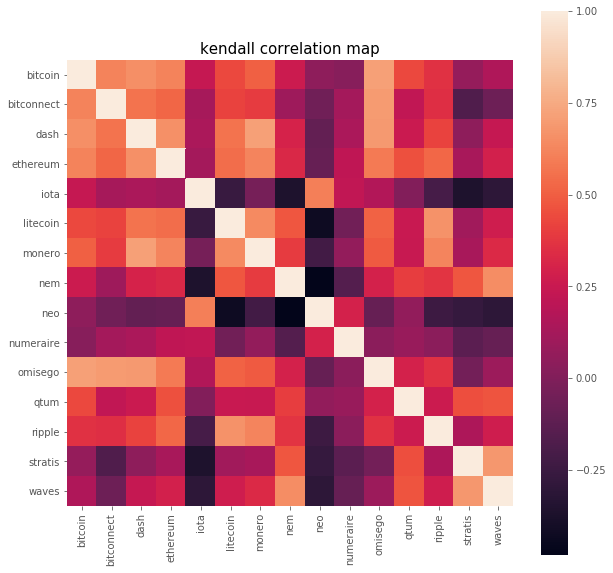

In [6]:
print('Choose Graph Type: [1]Trend Curve [2]Candlestick [3]Correlation Map')
choice = int(input())
if choice == 1:
    visuals.plot_trend(currencies, coin_type, coin_feat)
elif choice == 2:
    visuals.plot_candlestick(currencies, coin_type, coin_feat)
elif choice == 3:
    print('Choose correlation type: [1]Spearman [2]Pearson [3]Kendall')
    corr_choice = int(input())
    if choice == 1:
        visuals.plot_correlation('spearman')
    elif choice == 2:
        visuals.plot_correlation('pearson')
    elif choice == 3:
        visuals.plot_correlation('kendall')

In [ ]:
# Trend 

visuals.plot_trend(currencies, coin_type, coin_feat)

In [ ]:
# Candlestick
visuals.plot_candlestick(currencies, coin_type, coin_feat)

In [ ]:
# spearman correlation
visuals.plot_correlation()

In [ ]:
# pearson correlation
visuals.plot_correlation('pearson')

In [ ]:
# kendall correlation
visuals.plot_correlation('kendall')